<a href="https://colab.research.google.com/github/Anshul007/Analysis_in_Clustering/blob/main/Feature_Extraction_for_effective_Clustering_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [27]:
# Basics libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 0)
# pd.set_option("display.max_rows")

# for plotting the data
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use("seaborn-deep")
plt.rcParams["figure.figsize"] = (20,10)
# plt.figure(figsize=(20,10))

import seaborn as sns
sns.set_style("whitegrid")

# handling warnings
import warnings
warnings.filterwarnings("ignore")

# preprocessing
from sklearn.preprocessing import MinMaxScaler


# Loading dataset

In [14]:
data_url = "https://raw.githubusercontent.com/royjafari/DataAnalyticsForFun/main/FeatureExtraction%2BClustering/WH%20Report_preprocessed.csv"
df = pd.read_csv(data_url)
df.head()

,Name,Continent,year,population,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,Asia,2010,29185507.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
1,Afghanistan,Asia,2011,30117413.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
2,Afghanistan,Asia,2012,31161376.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
3,Afghanistan,Asia,2013,32269589.0,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
4,Afghanistan,Asia,2014,33370794.0,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375


# Pre-processing 

In [16]:
df.nunique()

Name                                 122
Continent                              7
year                                  10
population                          1220
Life_Ladder                         1045
Log_GDP_per_capita                  1011
Social_support                       408
Healthy_life_expectancy_at_birth     564
Freedom_to_make_life_choices         482
Generosity                           542
Perceptions_of_corruption            521
Positive_affect                      409
Negative_affect                      351
dtype: int64

In [17]:
df.isnull().sum()

Name                                0
Continent                           0
year                                0
population                          0
Life_Ladder                         0
Log_GDP_per_capita                  0
Social_support                      0
Healthy_life_expectancy_at_birth    0
Freedom_to_make_life_choices        0
Generosity                          0
Perceptions_of_corruption           0
Positive_affect                     0
Negative_affect                     0
dtype: int64

In [18]:
df.describe()

,year,population,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
count,1220.000000,1.220000e+03,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000
mean,2014.500000,5.311917e+07,5.529730,9.431966,0.815538,64.185311,0.760881,0.002459,0.732184,0.714270,0.270481
std,2.873459,1.733131e+08,1.152958,1.162152,0.119089,7.148290,0.136890,0.166349,0.192968,0.108795,0.082849
min,2010.000000,3.180410e+05,2.375000,6.885000,0.303000,32.300000,0.304000,-0.335000,0.047000,0.322000,0.095000
25%,2012.000000,5.560886e+06,4.658250,8.526000,0.753750,59.475000,0.671750,-0.114250,0.676000,0.628000,0.207750
50%,2014.500000,1.134228e+07,5.489500,9.564000,0.842000,65.830000,0.782500,-0.025000,0.792000,0.726000,0.262500
75%,2017.000000,3.634024e+07,6.382500,10.426750,0.909000,69.120000,0.873500,0.094250,0.861000,0.806000,0.322000
max,2019.000000,1.397715e+09,7.858000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.591000


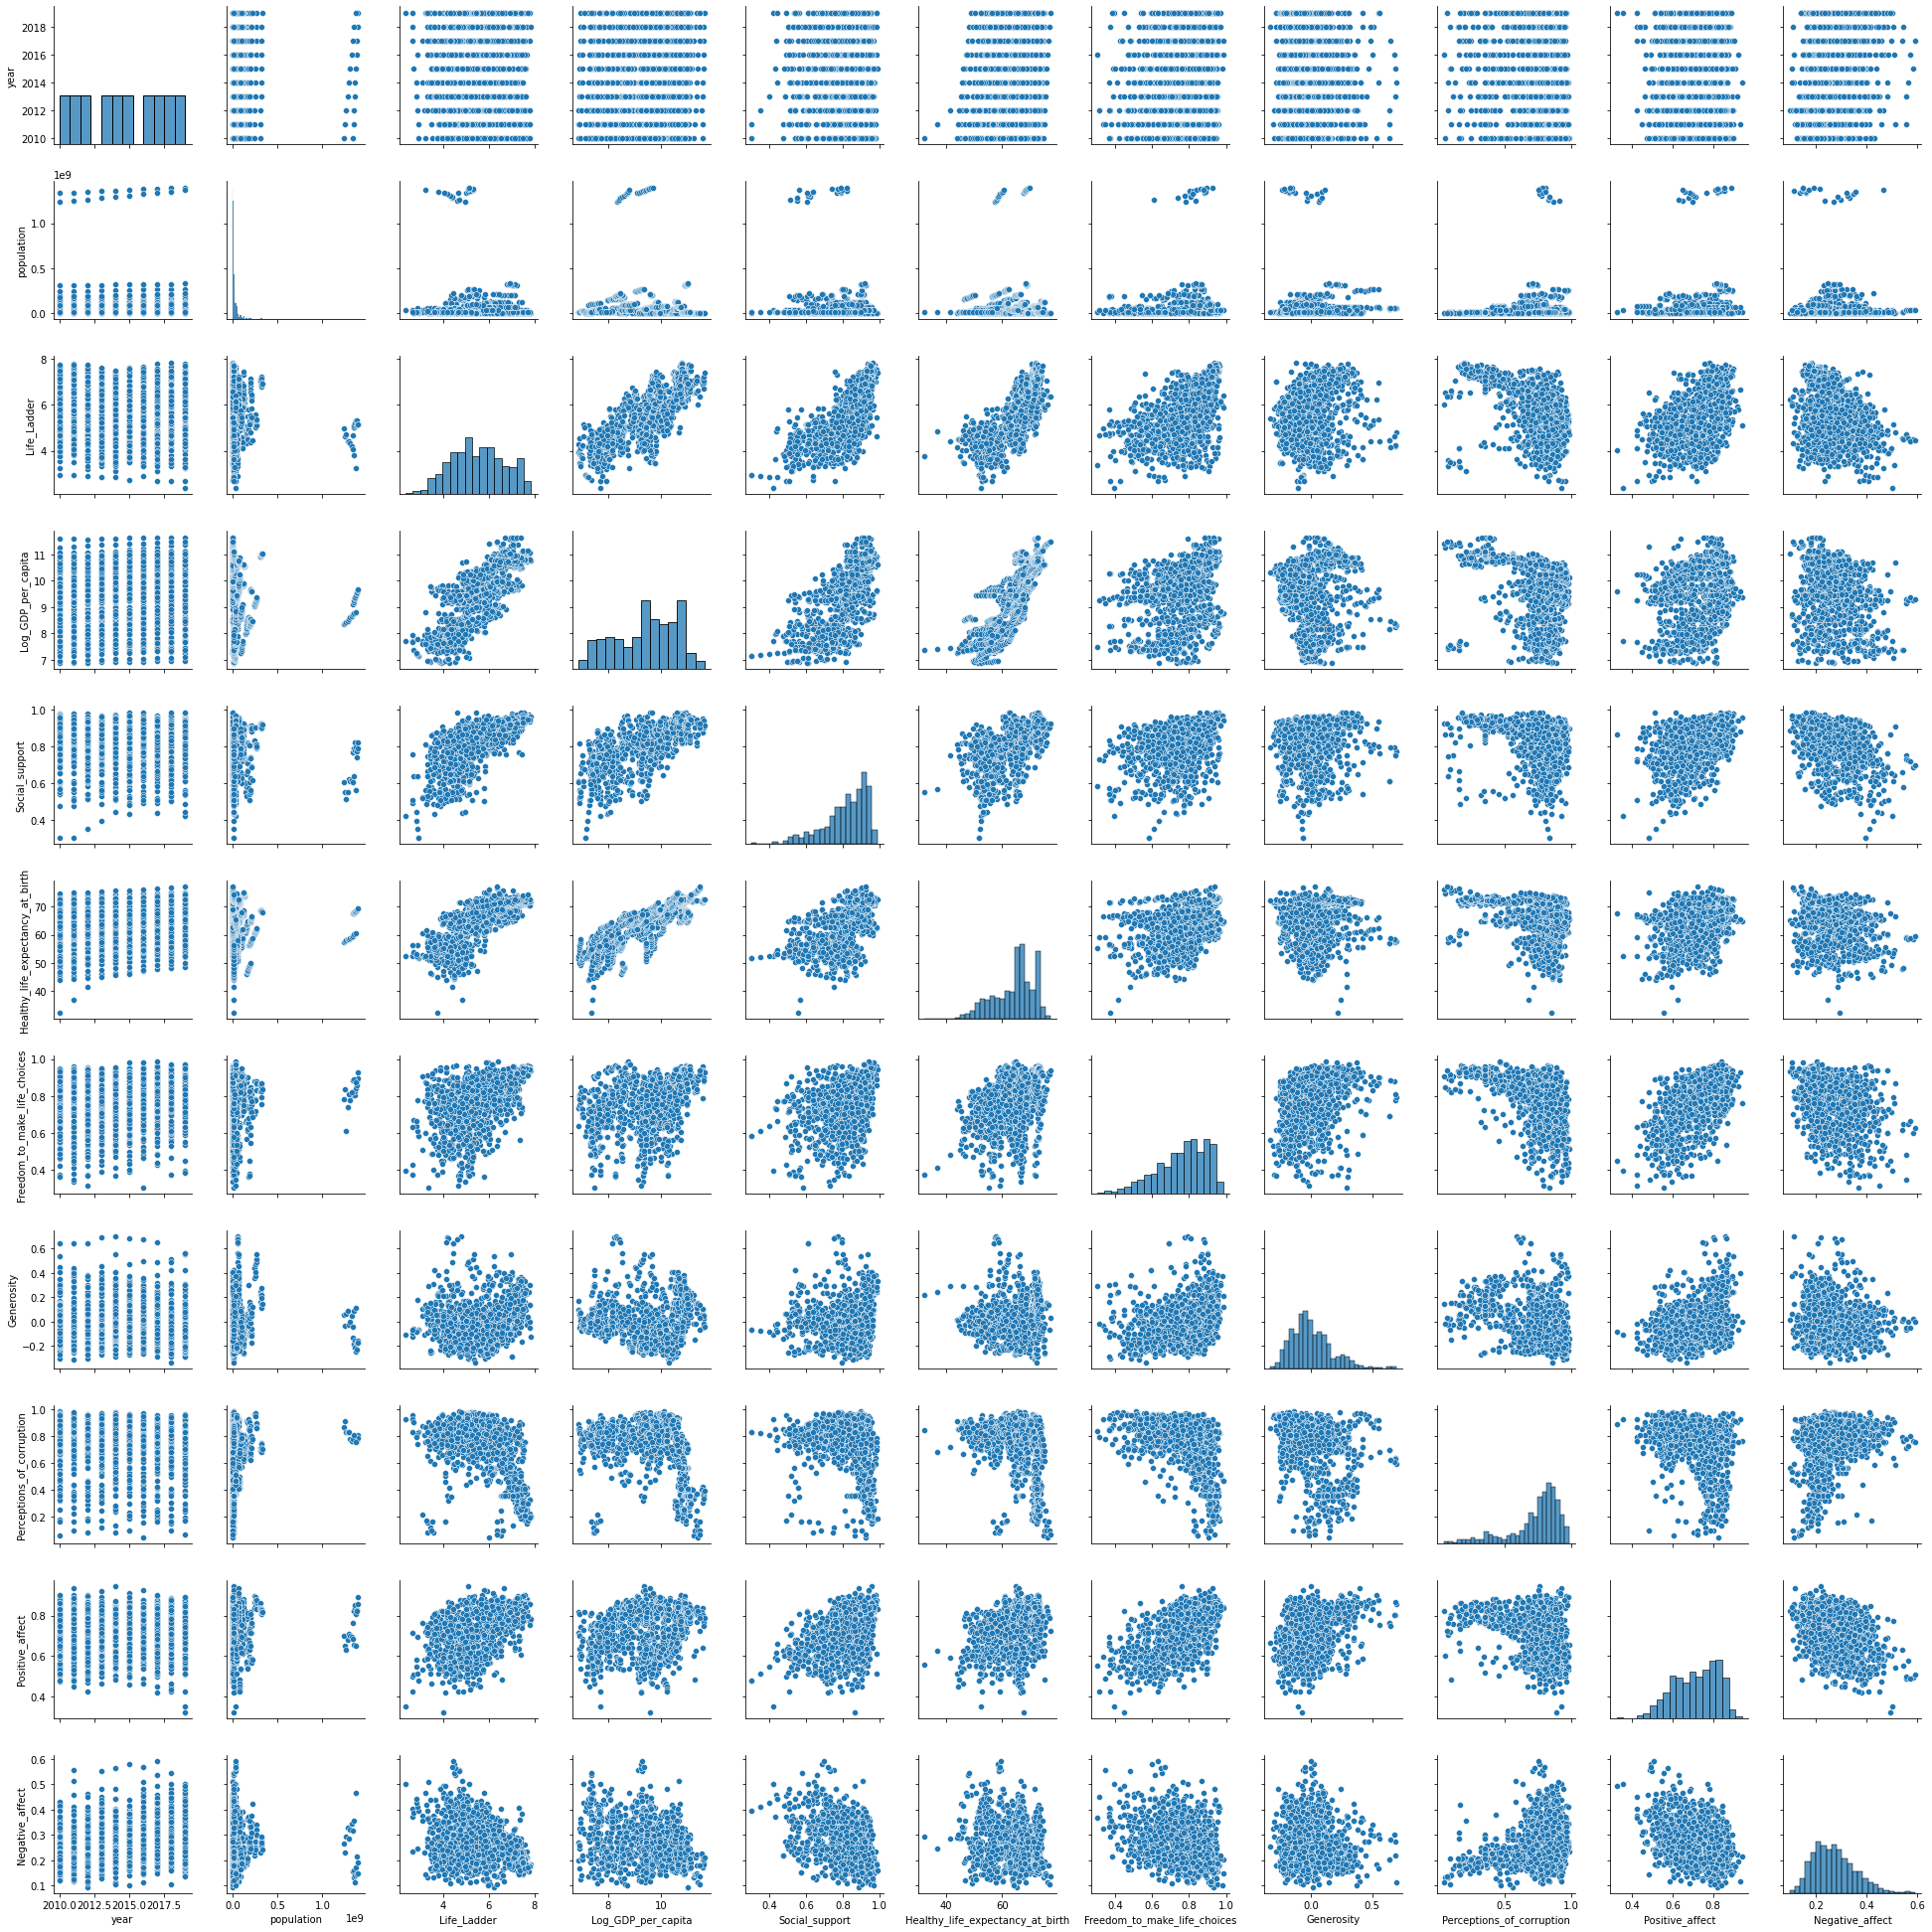

In [19]:
# checking the correlation
sns.pairplot(df)
plt.show()

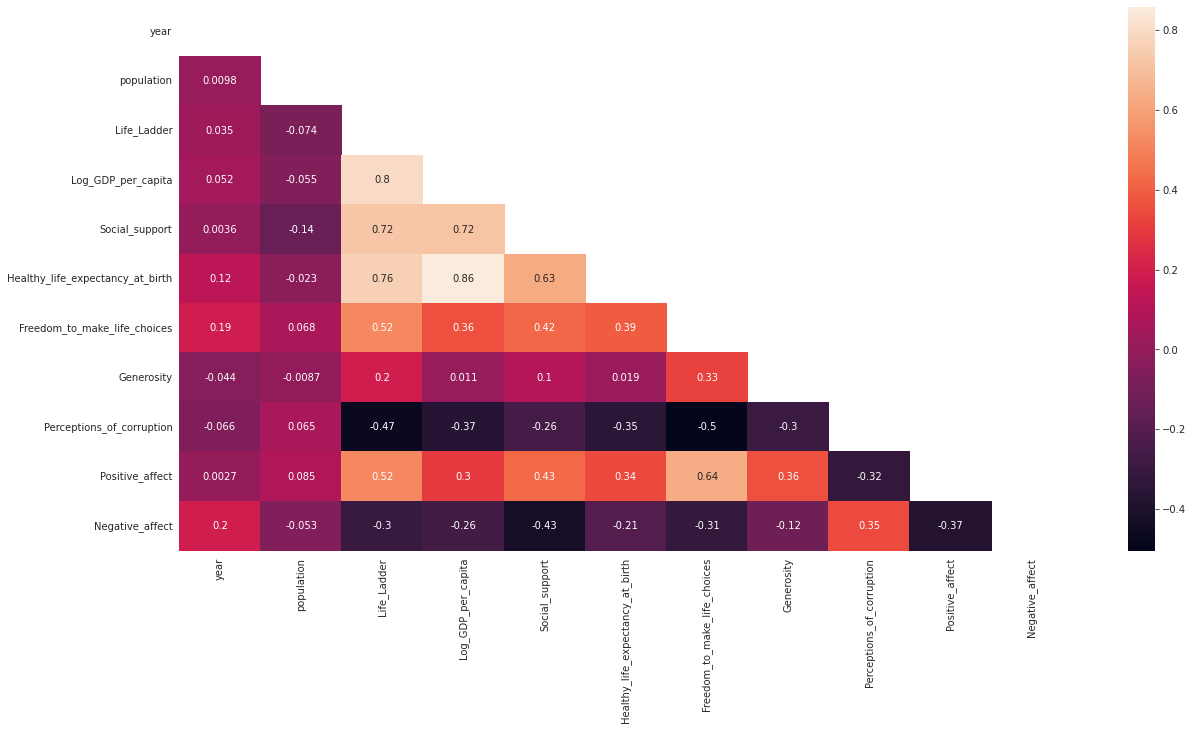

In [25]:
corr = df.corr()
mask = np.zeros_like(corr, dtype= np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask= mask, annot= True)
plt.show()

In [3]:
df.columns

Index(['Name', 'Continent', 'year', 'population', 'Life_Ladder',
       'Log_GDP_per_capita', 'Social_support',
       'Healthy_life_expectancy_at_birth', 'Freedom_to_make_life_choices',
       'Generosity', 'Perceptions_of_corruption', 'Positive_affect',
       'Negative_affect'],
      dtype='object')

In [9]:
# creating the pivot table
df.pivot(index= ['Name', 'Continent'],
         columns= ["year"],
         values= ['population', 'Life_Ladder','Log_GDP_per_capita', 'Social_support', 'Healthy_life_expectancy_at_birth',
                  'Freedom_to_make_life_choices', 'Generosity', 'Perceptions_of_corruption', 'Positive_affect', 'Negative_affect'])

population              ... Negative_affect       
year                             2010        2011  ...            2018   2019
Name        Continent                              ...                       
Afghanistan Asia           29185507.0  30117413.0  ...           0.405  0.502
Albania     Europe          2913021.0   2905195.0  ...           0.319  0.274
Algeria     Africa         35977455.0  36661444.0  ...           0.293  0.215
Argentina   South America  40788453.0  41261490.0  ...           0.321  0.319
Armenia     Europe          2877319.0   2876538.0  ...           0.455  0.430
...                               ...         ...  ...             ...    ...
Uruguay     South America   3359275.0   3368934.0  ...           0.275  0.222
Uzbekistan  Asia           28562400.0  29339400.0  ...           0.209  0.220
Vietnam     Asia           87967651.0  88871561.0  ...           0.191  0.186
Zambia      Africa         13605984.0  14023193.0  ...           0.351  0.394
Zimbabwe    Africa         12697723.0  12894316.0  ...           0.212  0.235

[122 rows x 100 columns]

In [10]:
# saving into another one
df = df.pivot(index= ['Name', 'Continent'],
              columns= ["year"],
              values= ['population', 'Life_Ladder','Log_GDP_per_capita', 'Social_support', 'Healthy_life_expectancy_at_birth',
                       'Freedom_to_make_life_choices', 'Generosity', 'Perceptions_of_corruption', 'Positive_affect', 'Negative_affect'])
df.head()

population              ... Negative_affect       
year                             2010        2011  ...            2018   2019
Name        Continent                              ...                       
Afghanistan Asia           29185507.0  30117413.0  ...           0.405  0.502
Albania     Europe          2913021.0   2905195.0  ...           0.319  0.274
Algeria     Africa         35977455.0  36661444.0  ...           0.293  0.215
Argentina   South America  40788453.0  41261490.0  ...           0.321  0.319
Armenia     Europe          2877319.0   2876538.0  ...           0.455  0.430

[5 rows x 100 columns]

In [11]:
data = df.drop(columns= ["population"])
data.head()

Life_Ladder                ... Negative_affect              
year                             2010   2011   2012  ...            2017   2018   2019
Name        Continent                                ...                              
Afghanistan Asia                4.758  3.832  3.783  ...           0.371  0.405  0.502
Albania     Europe              5.269  5.867  5.510  ...           0.334  0.319  0.274
Algeria     Africa              5.464  5.317  5.605  ...           0.289  0.293  0.215
Argentina   South America       6.441  6.776  6.468  ...           0.292  0.321  0.319
Armenia     Europe              4.368  4.260  4.320  ...           0.437  0.455  0.430

[5 rows x 90 columns]

In [26]:
data.shape

(122, 90)

In [29]:
trans_df = MinMaxScaler().fit_transform(data)
trans_df

array([[0.37644628, 0.18466612, 0.18047479, ..., 0.503386  , 0.6819222 ,
        1.        ],
       [0.48202479, 0.60408079, 0.53492509, ..., 0.41986456, 0.48512586,
        0.37362637],
       [0.52231405, 0.49072547, 0.55442293, ..., 0.31828442, 0.42562929,
        0.21153846],
       ...,
       [0.48760331, 0.58347073, 0.5400561 , ..., 0.13318284, 0.19221968,
        0.13186813],
       [0.42623967, 0.42518549, 0.43292057, ..., 0.53950339, 0.5583524 ,
        0.7032967 ],
       [0.3607438 , 0.3936521 , 0.42101662, ..., 0.17155756, 0.2402746 ,
        0.26648352]])

In [30]:
trans_df.shape

(122, 90)

In [33]:
trans_df = pd.DataFrame(trans_df,
                    index= data.index,
                    columns= data.columns)
trans_df

Life_Ladder            ... Negative_affect          
year                             2010      2011  ...            2018      2019
Name        Continent                            ...                          
Afghanistan Asia             0.376446  0.184666  ...        0.681922  1.000000
Albania     Europe           0.482025  0.604081  ...        0.485126  0.373626
Algeria     Africa           0.522314  0.490725  ...        0.425629  0.211538
Argentina   South America    0.724174  0.791426  ...        0.489703  0.497253
Armenia     Europe           0.295868  0.272877  ...        0.796339  0.802198
...                               ...       ...  ...             ...       ...
Uruguay     South America    0.645868  0.745672  ...        0.384439  0.230769
Uzbekistan  Asia             0.446074  0.577700  ...        0.233410  0.225275
Vietnam     Asia             0.487603  0.583471  ...        0.192220  0.131868
Zambia      Africa           0.426240  0.425185  ...        0.558352  0.703297
Zimbabwe    Africa           0.360744  0.393652  ...        0.240275  0.266484

[122 rows x 90 columns]

In [49]:
trans_df.describe()

Life_Ladder                          ... Negative_affect                        
year         2010        2011        2012  ...            2017        2018        2019
count  122.000000  122.000000  122.000000  ...      122.000000  122.000000  122.000000
mean     0.528748    0.537943    0.529963  ...        0.313640    0.421409    0.414227
std      0.244817    0.233737    0.236889  ...        0.189732    0.200086    0.245573
min      0.000000    0.000000    0.000000  ...        0.000000    0.000000    0.000000
25%      0.334659    0.374279    0.344103  ...        0.172122    0.248284    0.226648
50%      0.524690    0.496393    0.505370  ...        0.291196    0.401602    0.372253
75%      0.711312    0.739489    0.702299  ...        0.400113    0.571510    0.600962
max      1.000000    1.000000    1.000000  ...        1.000000    1.000000    1.000000

[8 rows x 90 columns]

# Cluster Validation
## Hopkins Clustering

In [34]:
def hopkins(df,m):
    from sklearn.neighbors import NearestNeighbors
    from random import sample
    from pandas import DataFrame
    from numpy import random

    d = len(df.columns) # columns
    n = len(df) # rows
    
    df = (df - df.min())/(df.max()-df.min()) *2 -1
    df = df / df.std()
    

    knn = NearestNeighbors(n_neighbors=2).fit(df)

    rand_df = DataFrame(random.rand(m,d),index = range(0,m),columns =df.columns )
    rand_df = rand_df*2-1
    rand_df = rand_df * df.abs().max()

    ujd = []
    wjd = []

    for j in range(0, m):
        u_dist, _ = knn.kneighbors([rand_df.iloc[j]])
        ujd.append(u_dist[0][0])

        w_dist, _ = knn.kneighbors(df.sample(1))
        wjd.append(w_dist[0][1])

    return(sum(ujd) / (sum(ujd) + sum(wjd)))

In [36]:
m = 10
hopkins(trans_df, m)

0.7233259805300319

## Cluster Comparison

In [37]:
def countpairs(Clustering1,Clustering2):
    from pandas import Series
    
    output = Series(0,index=['N00','N01','N10','N11'])

    for i in range(0,10):
        for j in range(0,i):
            if(i!=j):

                c1_same = False
                c2_same = False
                c1_Not_same = False
                c2_Not_same = False

                if(Clustering1[i]==Clustering1[j]):
                    c1_same=True
                else:
                    c1_Not_same=True
                if(Clustering2[i]==Clustering2[j]):
                    c2_same=True
                else:
                    c2_Not_same = True

                if(c1_same & c2_same):
                    output.N11 = output.N11 +1 
                if(c1_Not_same & c2_Not_same):
                    output.N00 = output.N00 +1
                if(c1_same & c2_Not_same):
                    output.N10 = output.N10 +1
                if(c1_Not_same & c2_same):
                    output.N01 = output.N01 +1

    return(output)

## Fowlkes–Mallows

In [38]:
def fowlkes_mallows(Clustering1,Clustering2):
    
    from numpy import sqrt
    from pandas import Series
    
    p = countpairs(Clustering1,Clustering2)
    
    return(p.N11/((p.N11+p.N01)+(p.N11+p.N10)))

## Measuring the consistency

In [40]:
from sklearn.cluster import KMeans

In [60]:
for itr in range(0, 10):
  kmeans = KMeans(n_clusters= 7)
  clustering1 = kmeans.fit(trans_df).labels_
  clustering2 = kmeans.fit(trans_df).labels_
  print(f"fowlkes_mallows in {itr} is : {fowlkes_mallows(clustering1,clustering2)}")

fowlkes_mallows in 0 is : 0.2727272727272727
fowlkes_mallows in 1 is : 0.4375
fowlkes_mallows in 2 is : 0.3333333333333333
fowlkes_mallows in 3 is : 0.25
fowlkes_mallows in 4 is : 0.3333333333333333
fowlkes_mallows in 5 is : 0.4666666666666667
fowlkes_mallows in 6 is : 0.2727272727272727
fowlkes_mallows in 7 is : 0.5
fowlkes_mallows in 8 is : 0.2857142857142857
fowlkes_mallows in 9 is : 0.4666666666666667


# Finding the k (# of cluster)

## Method 1: Using Sum of Squared Error(SSE)

In [61]:
repetitions = ['R{}'.format(i) for i in range(1,10)]

SSE_results = pd.DataFrame(0.0, index = range(2,15), 
                       columns= repetitions)


for n_cluster in SSE_results.index:
    for col in SSE_results.columns:
        algort = KMeans(n_clusters=n_cluster).fit(trans_df)
        # Inertia: Sum of distances of samples to their closest cluster center
        SSE_results.at[n_cluster,col] = algort.inertia_ 

SSE_results['Mean'] = SSE_results[repetitions].mean(axis=1)
SSE_results['Var'] = SSE_results[repetitions].var(axis=1)
SSE_results.sort_values('Mean')

,R1,R2,R3,R4,R5,R6,R7,R8,R9,Mean,Var
14,145.503958,141.157633,142.650152,143.437376,144.654206,145.113076,145.869499,145.250701,141.283459,143.880007,3.306973
13,148.654860,150.154524,152.244840,148.150235,149.497851,151.698173,146.629943,148.825847,151.227541,149.675979,3.341005
12,153.181796,153.523904,154.077299,152.414847,152.079295,154.346004,154.387514,152.538273,152.198143,153.194120,0.864019
11,159.861927,155.480356,160.939096,159.670083,160.816401,160.710682,161.828359,158.138716,158.513786,159.551045,3.726329
10,166.692462,164.342631,166.865981,164.779216,167.242132,164.716224,167.315575,165.865752,163.408657,165.692070,2.033503
9,170.089950,174.094924,172.791954,171.420422,172.082328,170.591673,171.096512,170.513018,171.508145,171.576547,1.580723
8,177.396394,177.685237,178.575417,177.081829,177.670027,178.152609,178.954842,176.138904,179.975699,177.958995,1.254173
7,185.531342,186.232530,186.010461,185.871267,186.483593,185.604375,185.123069,185.391504,185.696476,185.771624,0.180347
6,194.846136,195.001481,194.649366,193.433674,193.292733,193.734184,194.863436,194.769574,193.399827,194.221157,0.536247
5,208.215820,208.468216,208.491804,208.463510,208.215820,208.706662,208.192363,209.049770,208.047666,208.427959,0.095177


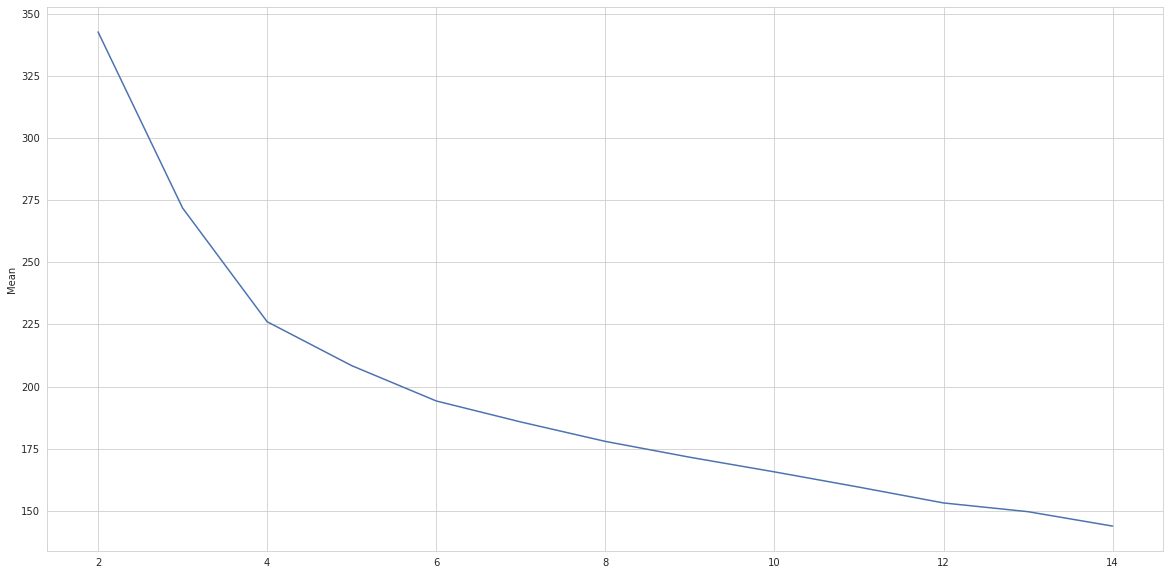

In [62]:
sns.lineplot(x= SSE_results.index, y= SSE_results.Mean)
plt.show()

> at k=4, there is something. let's validate from another one is Silhouette score.
## Method 2: Using Silhouette Score

---
> `Silhouette` this will not only check intra-distance but also inter-distance.<br>
This will be more precise compare to SSE

In [63]:
from sklearn.metrics import silhouette_score

In [65]:
repetitions = ['R{}'.format(i) for i in range(1,10)]

SIL_results = pd.DataFrame(0.0, index = range(2,15), 
                       columns= repetitions)


for n_cluster in SIL_results.index:
    for col in SIL_results.columns:
        algort = KMeans(n_clusters=n_cluster).fit(trans_df)
        SIL_results.at[n_cluster,col] = silhouette_score(X= trans_df, labels= algort.labels_) 

SIL_results['Mean'] = SIL_results[repetitions].mean(axis=1)
SIL_results['Var'] = SIL_results[repetitions].var(axis=1)
SIL_results.sort_values(["Mean"], ascending= True)

,R1,R2,R3,R4,R5,R6,R7,R8,R9,Mean,Var
14,0.143633,0.149046,0.140738,0.139765,0.152084,0.118159,0.141334,0.125204,0.134944,0.138323,1.174575e-04
12,0.160313,0.129562,0.133137,0.163715,0.167470,0.162848,0.138172,0.157405,0.154555,0.151909,2.061874e-04
13,0.167922,0.118329,0.138300,0.164986,0.149709,0.157822,0.143708,0.174902,0.152152,0.151981,2.970021e-04
11,0.168811,0.141460,0.168073,0.146513,0.152707,0.171510,0.159841,0.179806,0.166182,0.161656,1.574965e-04
10,0.164262,0.175298,0.177486,0.174479,0.151065,0.170827,0.176760,0.141698,0.162932,0.166090,1.569173e-04
9,0.172567,0.173340,0.156464,0.173316,0.180430,0.182259,0.170974,0.168856,0.186306,0.173835,7.585410e-05
8,0.194964,0.174068,0.184276,0.180179,0.161994,0.171443,0.189501,0.178018,0.172935,0.178598,1.001597e-04
7,0.198196,0.195396,0.206184,0.179560,0.187548,0.177824,0.179395,0.181768,0.203252,0.189903,1.221528e-04
6,0.198477,0.202899,0.199227,0.204315,0.197649,0.200477,0.202830,0.201900,0.200708,0.200942,4.977415e-06
5,0.231218,0.226865,0.229605,0.229026,0.229794,0.221877,0.229605,0.229396,0.230920,0.228701,8.077844e-06


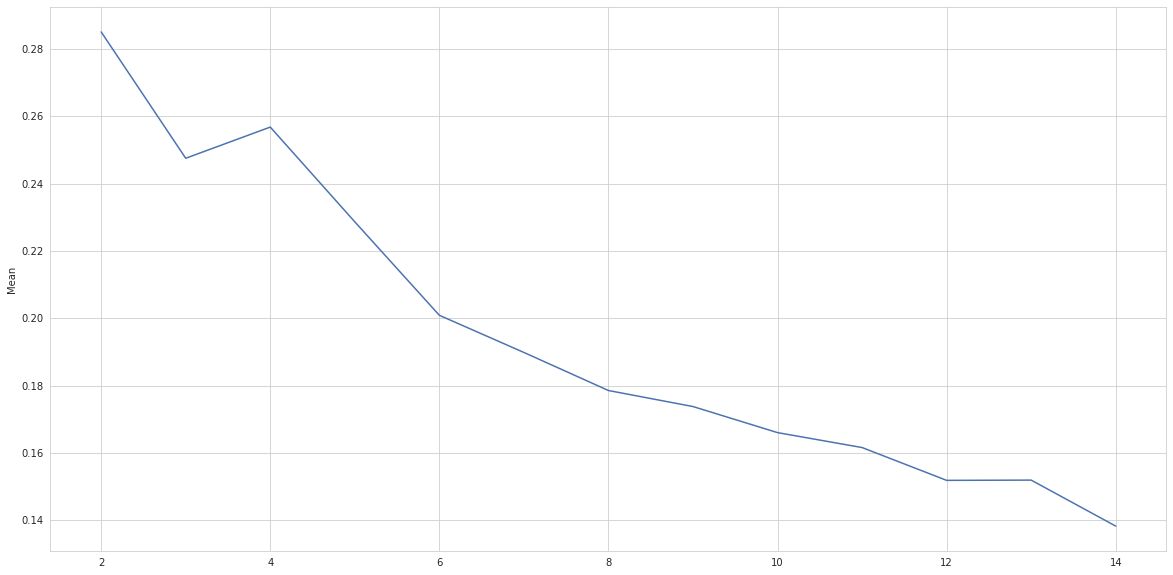

In [66]:
# plotting the silhouette score
sns.lineplot(x= SIL_results.index, y= SIL_results.Mean)
plt.show()

# Running the Model
> Now we know from both the methods, that the suitable number of cluster is 4. <br>so let's run!!!!!

In [68]:
kmeans = KMeans(n_clusters= 4).fit(trans_df)
memb = pd.Series(data= kmeans.labels_, index= trans_df.index)
memb

Name         Continent    
Afghanistan  Asia             2
Albania      Europe           3
Algeria      Africa           3
Argentina    South America    0
Armenia      Europe           3
                             ..
Uruguay      South America    0
Uzbekistan   Asia             0
Vietnam      Asia             0
Zambia       Africa           2
Zimbabwe     Africa           2
Length: 122, dtype: int32

# Centroid Analysis

In [70]:
clusters = ['Cluster {}'.format(i) for i in range(4)]
Centroids_orig = pd.DataFrame(0.0, index = clusters, columns = data.columns) # without preprocessing

Centroids_std = pd.DataFrame(0.0, index =  clusters, columns = trans_df.columns) # after preprocessing
for cluster in range(4):
    BM = memb==cluster # for every cluster
    Centroids_orig.iloc[cluster] = data[BM].median(axis=0) # this is for us
    Centroids_std.iloc[cluster] = trans_df[BM].mean(axis=0) # this is for heatmap
    
Centroids_orig

Life_Ladder                         ... Negative_affect                       
year             2010   2011    2012    2013  ...            2016   2017    2018    2019
Cluster 0      5.8765  5.789  5.9475  5.9495  ...           0.282  0.278  0.2825  0.2730
Cluster 1      7.3030  7.354  7.2500  7.3640  ...           0.208  0.196  0.2060  0.2050
Cluster 2      4.2560  4.434  4.3130  4.1280  ...           0.325  0.354  0.3590  0.3580
Cluster 3      5.0615  5.084  5.1105  5.0780  ...           0.301  0.301  0.2915  0.2655

[4 rows x 90 columns]

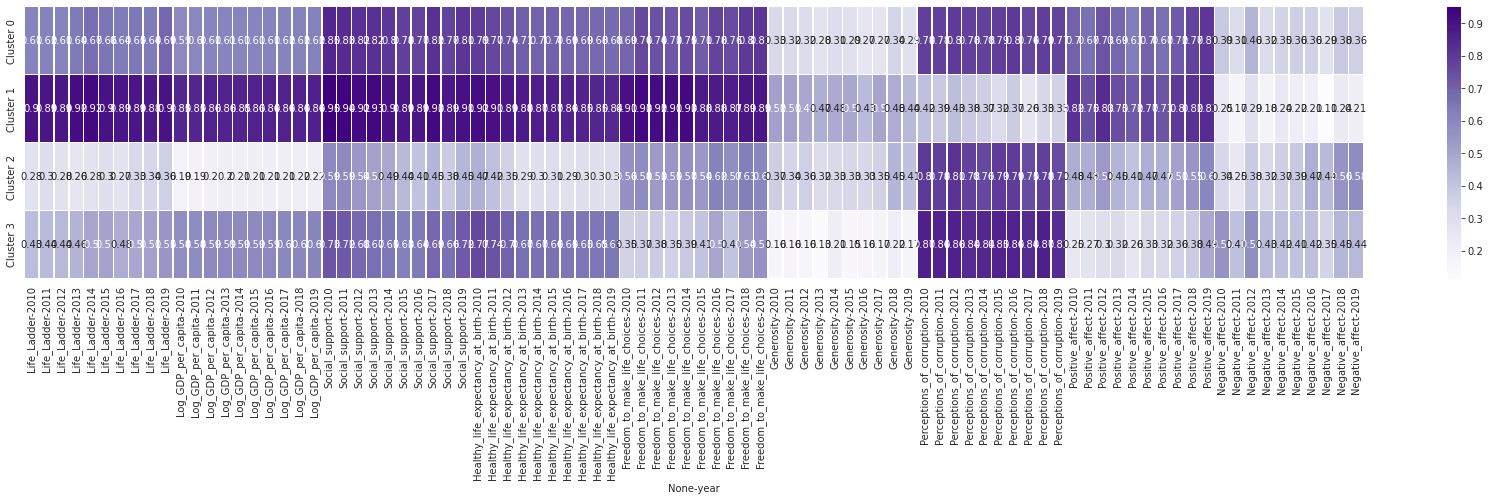

In [72]:
plt.figure(figsize= (30,5))
sns.heatmap(Centroids_std, linewidth= 0.5, annot= True, cmap= "Purples")
plt.show()

In [73]:
replace_dic = {2:'unhappy but generous',
               3:'generously happy but crime-ridden',
               0:'happy but crime-ridden',
               1:'Very happy'}
data['Cluster_noPreprocess'] = memb.replace(replace_dic)
data

Life_Ladder  ...               Cluster_noPreprocess
year                             2010  ...                                   
Name        Continent                  ...                                   
Afghanistan Asia                4.758  ...               unhappy but generous
Albania     Europe              5.269  ...  generously happy but crime-ridden
Algeria     Africa              5.464  ...  generously happy but crime-ridden
Argentina   South America       6.441  ...             happy but crime-ridden
Armenia     Europe              4.368  ...  generously happy but crime-ridden
...                               ...  ...                                ...
Uruguay     South America       6.062  ...             happy but crime-ridden
Uzbekistan  Asia                5.095  ...             happy but crime-ridden
Vietnam     Asia                5.296  ...             happy but crime-ridden
Zambia      Africa              4.999  ...               unhappy but generous
Zimbabwe    Africa              4.682  ...               unhappy but generous

[122 rows x 91 columns]

# ------------------------------------------------------------------------------------------------------------------------------------

> Let's do PCA on standarize data and then apply the clustering algorithm.
# Principle Component Analysis

In [74]:
from sklearn.decomposition import PCA

In [ ]:
pcs = PCA() # this is the transformed data
pcs.fit(trans_df)